In [269]:
!pip install scikit-learn
!pip install pandas
!pip install mglearn

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Retrival dei dati e preparazione

In [271]:
train=pd.read_csv('train.csv', sep=',')
#train.head()

test=pd.read_csv('test.csv', sep=',')
#test.head()

from sklearn.preprocessing import LabelEncoder   #per dopo

In [272]:
train["TotalCharges"]=train["TotalCharges"].apply(lambda x: float(x) if len(x)>1 else np.nan)     #passo da object a float
train["TotalCharges"].fillna(0,inplace=True)                                                      #setto i NaN a 0


for label in train.columns:
    if(label not in ['TotalCharges', 'MonthlyCharges']):   
        train[label] = LabelEncoder().fit_transform(train[label])
train.head()                                                                                        #trasformo tutti i valori non numerici in numeri

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,4308,0,0,0,0,42,1,0,1,...,2,2,2,2,2,0,1,0,103.8,4327.50
1,1,1175,1,1,0,0,2,1,2,1,...,0,0,0,2,2,0,1,2,94.0,181.70
2,1,517,0,0,0,0,38,1,0,1,...,2,2,0,0,0,0,1,1,83.9,3233.60
3,0,3236,0,0,0,0,72,1,2,0,...,2,2,2,2,2,2,0,0,86.6,6350.50
4,0,514,0,0,1,0,23,1,0,0,...,0,0,2,2,0,1,0,0,60.0,1347.15


In [273]:
test["TotalCharges"]=test["TotalCharges"].apply(lambda x: float(x) if len(x)>1 else np.nan)     #passo da object a float
test["TotalCharges"].fillna(0,inplace=True)                                                      #setto i nan a 0


for label in test.columns:
    if(label not in ['TotalCharges', 'MonthlyCharges']):   
        test[label] = LabelEncoder().fit_transform(test[label])
test.head() 

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1236,1,0,0,0,59,0,1,0,...,0,0,2,2,2,0,1,2,51.70,3005.80
1,0,7,0,0,1,0,59,1,2,1,...,2,0,0,2,0,0,1,2,94.75,5597.65
2,1,372,1,0,0,1,4,1,2,1,...,0,0,2,0,0,0,0,1,80.80,332.45
3,1,51,0,0,0,0,41,1,2,1,...,2,2,0,2,2,0,1,2,106.30,4443.45
4,0,755,1,0,0,0,46,0,1,0,...,0,2,2,2,2,2,1,0,60.75,2893.40


#### Drop di "customerID", una feature che non serve per studiare il comportamneto di un cliente ma solo per indicarlo.

In [274]:
train = train.drop(columns = ["customerID"])
test = test.drop(columns = ["customerID"])

In [275]:
y_train = train["Churn"].values                   #poisonus o meno
x_train = train.drop(["Churn"], axis=1).values    #tutto il resto
y_test = test["Churn"].values
x_test = test.drop(["Churn"], axis=1).values

### Si reputa una buona scelta quella di utilizzare un modello KNN per la classificazione:

In [276]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [277]:
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [278]:
print("Test set predictions:", clf.predict(x_test))

Test set predictions: [0 0 1 ... 0 0 0]


In [279]:
print("Test set accuracy: {:.2f}".format(clf.score(x_test, y_test)))

Test set accuracy: 0.76


#### Lo score è ottenuto con l'utilizzo di 3 neighbours, si può studiare però la variazione delle performance all'aumentare dei neighbours

1
Training set score: 0.999
Test set score: 0.708
2
Training set score: 0.859
Test set score: 0.756
3
Training set score: 0.858
Test set score: 0.761
4
Training set score: 0.831
Test set score: 0.770
5
Training set score: 0.829
Test set score: 0.770
6
Training set score: 0.818
Test set score: 0.771
7
Training set score: 0.813
Test set score: 0.769
8
Training set score: 0.811
Test set score: 0.779
9
Training set score: 0.814
Test set score: 0.775
10
Training set score: 0.810
Test set score: 0.778
11
Training set score: 0.810
Test set score: 0.775
12
Training set score: 0.806
Test set score: 0.775
13
Training set score: 0.809
Test set score: 0.780
14
Training set score: 0.802
Test set score: 0.771
15
Training set score: 0.801
Test set score: 0.772
16
Training set score: 0.799
Test set score: 0.774
17
Training set score: 0.800
Test set score: 0.778
18
Training set score: 0.798
Test set score: 0.775
19
Training set score: 0.799
Test set score: 0.776
20
Training set score: 0.796
Test set sc

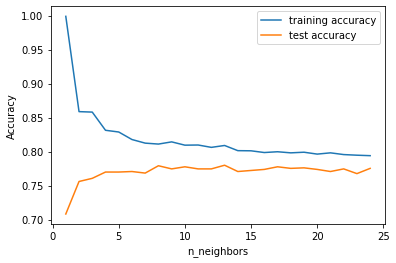

In [281]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 25) # prova n_neighbors che va da 1 a 25, valore puramente arbitrario

for n_neighbors in neighbors_settings:

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)     # costruzione del modello
    clf.fit(x_train, y_train)

    training_accuracy.append(clf.score(x_train, y_train))

    test_accuracy.append(clf.score(x_test, y_test))
    
    #stampe per ogni iterazione
    print(n_neighbors)
    print("Training set score: {:.3f}".format(training_accuracy[-1]))
    print("Test set score: {:.3f}".format(test_accuracy[-1]))           

#stampe complessive
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Si nota che aumentando il numero di neighbours l'accuratezza aumenta subito per poi migliorare lentamente in seguito.
### Attenzione però che il verso dell'andamento delle curve è leggermente "in discesa", ovvero settare un numero molto alto di neighbours peggiorerà sempre più i valori di accuratezza

### Sono state fatte delle considerazioni
Cercando un modo per migliorare le performance del modello, ho trovato una soluzione la cui idea base è la seguente:
In un modello KNN, un fattore che "rovina" il risultato è il fatto che i valori di train variano su scale diverse. Una soluzione possibile per rimediare è dunque quella di normalizzare i valori delle features in una scala comune.

Il procediemnto è il seguente:


#### Sono state create delle copie per test e train solo per disaccoppiare il seguente tentativo in fase di scrittura di codice

In [ ]:
train_model = train.copy()
test_model = test.copy()



#### Un oggetto di scikit learn, lo scaler, avrebbe dovuto poi effetuare appunto la scalatura(?)(lo scaling) dei valori delle features
Per far girare tutto è stato necessario definire due liste contenenti una array con i valori delle etichette

In [283]:
trnc = [list(train.columns.values)]
tstc = [list(test.columns.values)]

In [284]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for feature in trnc:
    train_model[feature] = scaler.fit_transform(train_model[feature])
    
for feature in tstc:
    test_model[feature] = scaler.fit_transform(test_model[feature])


#### In seguito, come sopra, sono stati divisi i dati di train e di test in input per il modello e output attesi

In [285]:
knn = KNeighborsClassifier()



y_train = train_model["Churn"].values                   
x_train = train_model.drop(["Churn"], axis=1).values
y_test = test_model["Churn"].values
x_test = test_model.drop(["Churn"], axis=1).values

In [287]:
knn.fit(x_train, y_train)

#Predict testing set
y_pred = knn.predict(x_test)

#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

#Check performance using roc
roc_auc_score(y_test, y_pred)

ValueError: Unknown label type: 'continuous'

### Ma vi è un errore qui: il tipo delle etichette è "continuous" e non permette di effettuare il trining del modello
#### Dunque sono stati fatti alcuni tentativi per effettuare un encoding delle labes, ragionando in modo simila e come si ha lavorato sulla preparazione dei dati

In [289]:
from sklearn import preprocessing
from sklearn import utils

In [290]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[0 1 1 ... 0 0 0]
continuous
binary
binary


### Questo è il punto in cui ho dovuto ammettere la sconfitta e accettare il risultato ottennuto sopra:
Studiando il tipo delle label si ottiene 
```
[0 1 1 ... 0 0 0]
continuous
binary
binary
```

Lavorandoci un pò sopra, con vari tentativi sono riuscito a farmi tornare
```
binary
binary
binary
```

Ma nel momento in cui ho fatto ripartire tutto ho di nuovo ottenuto
```
continuous
binary
binary
```

### Il problema è che non sono sicurissimo di dove io stia mettendo mano e dopo averci sbattuto la testa per un po' ritengo opportuno non sprecare altro tempo e chiudere la challenge con i risultati che sono già riuscito a ottenere

In allegato lascerei un'immagine di He-Man per mantenere viva la meme ma tempo che distrugga i bot per raccogliere le consegne

Dunque la scio il link di un'immagine di me quando spero che lasciaare il ragionamento senza risultato basti per elemosinare quel punto in piu sulla challenge

https://i.kym-cdn.com/photos/images/facebook/000/505/707/f90.jpg